# Opening a New Restaurant in Alberta, Canada

> This notebook contains Final Project for Applied Data Science Capstone

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# for webscraping import Beautiful Soup 
from bs4 import BeautifulSoup

import xml

## 1.Build a dataframe of neighborhoods in Alberta, Canada by web scraping the data from Wikipedia page

### Dataframe

The dataframe will consist of five columns:

* PostalCode
* Borough
* Neighborhood
* Latitude
* Longitude

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T'

In [3]:
requestUrl = requests.get(url).text
soup = BeautifulSoup(requestUrl,'lxml')

In [4]:
table = soup.find("table",{"class":"wikitable"})
fields = table.find_all('td')

postalcode = []
borough = []
neighborhood = []
latitude = []
longitude = []

In [5]:
for i in range(0, len(fields), 5):
    postalcode.append(fields[i].text.strip())
    borough.append(fields[i+1].text.strip())
    neighborhood.append(fields[i+2].text.strip())
    latitude.append(fields[i+3].text.strip())
    longitude.append(fields[i+4].text.strip())
        
newdf = pd.DataFrame(data=[postalcode, borough, neighborhood, latitude, longitude]).transpose()
newdf.columns = ['PostalCode', 'Borough', 'Neighborhood', 'Latitude', 'Longitude']

In [6]:
print(newdf.shape)
newdf.head()

(180, 5)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413


## 2.Data Preprocessing

Only process the cells that have an assigned borough. Ignore cells with a **borough** that is **Not assigned**.

In [7]:
newdf.drop(newdf[newdf['Borough'] == 'Not assigned'].index, inplace = True)

In [8]:
print(newdf.shape)
newdf.head()

(144, 5)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413


If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

In [9]:
newdf['Neighborhood'] = np.where((newdf['Neighborhood'] == 'Not assigned'), #Identifies the case to apply to
                           newdf['Borough'],      #This is the value that is inserted
                           newdf['Neighborhood'])      #This is the column that is affected

**Neighborhood** and **Borough** are now cleaned

In [10]:
newdf[newdf['Neighborhood']=="Not assigned"]

,PostalCode,Borough,Neighborhood,Latitude,Longitude


In [11]:
newdf[newdf['Borough']=="Not assigned"]

,PostalCode,Borough,Neighborhood,Latitude,Longitude


In [12]:
temp = newdf[newdf['Longitude']=="Not assigned"]
temp

,PostalCode,Borough,Neighborhood,Latitude,Longitude
84,T4M,Blackfalds,Blackfalds,Not assigned,Not assigned
119,T3S,Calgary,Southeast Calgary,Not assigned,Not assigned
128,T3T,Tsuut'ina,Tsuut'ina,Not assigned,Not assigned
133,T8T,Sturgeon County,Sturgeon County,Not assigned,Not assigned
167,T6Y,Edmonton,South Industrial,Not assigned,Not assigned
171,T1Z,Rocky View,Rocky View,Not assigned,Not assigned


In [13]:
b_list = temp['Borough']
NewLatitude=[]
NewLogitude=[]
geolocator = Nominatim(user_agent="Alberta")
i=0
for itr in b_list:
    location = geolocator.geocode(itr+", AB, Canada")
    latitude = location.latitude
    longitude = location.longitude
    NewLatitude.append(latitude)
    NewLogitude.append(longitude)
    i=i+1


In [14]:
print(NewLatitude)

[52.3865007, 51.0534234, 50.96502825, 53.8422302, 53.535411, 51.3699347]


In [15]:
temp['Latitude'] = (NewLatitude)
temp['Longitude'] = (NewLogitude)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [16]:
temp

,PostalCode,Borough,Neighborhood,Latitude,Longitude
84,T4M,Blackfalds,Blackfalds,52.386501,-113.783129
119,T3S,Calgary,Southeast Calgary,51.053423,-114.062589
128,T3T,Tsuut'ina,Tsuut'ina,50.965028,-114.350423
133,T8T,Sturgeon County,Sturgeon County,53.842230,-113.540655
167,T6Y,Edmonton,South Industrial,53.535411,-113.507996
171,T1Z,Rocky View,Rocky View,51.369935,-114.014186


In [17]:
newdf[newdf['Latitude']=="Not assigned"]=temp

Now changing data types of **Latitude** and **Logitude** to **float**

In [18]:
newdf.dtypes

PostalCode      object
Borough         object
Neighborhood    object
Latitude        object
Longitude       object
dtype: object

In [19]:
newdf["Latitude"]= newdf["Latitude"].astype(float)
newdf["Longitude"]= newdf["Longitude"].astype(float)

In [20]:
newdf.dtypes

PostalCode       object
Borough          object
Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

### The dataframe is now cleaned

In [21]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 177
Data columns (total 5 columns):
PostalCode      144 non-null object
Borough         144 non-null object
Neighborhood    144 non-null object
Latitude        144 non-null float64
Longitude       144 non-null float64
dtypes: float64(2), object(3)
memory usage: 6.8+ KB


## 3. Explore and cluster the neighborhoods in Alberta

In [22]:
!pip install folium

     |████████████████████████████████| 102kB 7.1MB/s ta 0:00:011


In [23]:
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt

#for maps
import folium

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [24]:
address = 'Alberta , Canada'

geolocator = Nominatim(user_agent="Alberta")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the City of Alberta are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of the City of Alberta are 55.001251, -115.002136.


In [25]:
map_alberta = folium.Map(location=[latitude, longitude], zoom_start=6)

for lat, lng, label in zip(newdf['Latitude'], newdf['Longitude'], newdf['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_alberta)  


In [26]:
map_alberta

**Foursquare api credentials**

In [27]:
# The code was removed by Watson Studio for sharing.

credentails Added


In [28]:
# defining radius and limit of venues to get
radius=500
LIMIT=100

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [30]:
alberta_venues = getNearbyVenues(names=newdf['Neighborhood'],
                                   latitudes=newdf['Latitude'],
                                   longitudes=newdf['Longitude']
                                  )

Central Medicine Hat
Penbrooke Meadows, Marlborough
Dalhousie, Edgemont, Hamptons, Hidden Valley
East Airdrie
West Clareview, East Londonderry
North Capilano
Drayton Valley
West Sherwood Park
Wetaskiwin
South Medicine Hat
Forest Lawn, Dover, Erin Woods
Montgomery, Bowness, Silver Springs, Greenwood
West Airdrie
East North Central, West Beverly
SE Capilano, West Southeast Industrial, East Bonnie Doon
Outer Southwest
North Medicine Hat
Lynnwood Ridge, Ogden, Foothills Industrial, Great Plains
Rosscarrock, Westgate, Wildwood, Shaganappi, Sunalta
Cochrane
Central Londonderry
Central Bonnie Doon
Inner Southwest Sherwood Park
Vegreville
Bridgeland, Greenview, Zoo, YYC
Lakeview, Glendale, Killarney, Glamorgan
Red Deer County
West Londonderry, East Calder
South Bonnie Doon, East University
Edson
Central Sherwood Park (Ardrossan)
Leduc (Includes YEG)
Taber
Inglewood, Burnsland, Chinatown, East Victoria Park, Saddledome
Hawkwood, Arbour Lake, Citadel, Ranchlands, Royal Oak, Rocky Ridge
Innisfail

In [31]:
print("shape of Alberta dataframe: ", alberta_venues.shape)

alberta_venues.head()

shape of Alberta dataframe:  (1007, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Medicine Hat,50.03646,-110.67925,Local Public Eatery Medicine Hat,50.039218,-110.676133,Pub
1,Central Medicine Hat,50.03646,-110.67925,Madhatter Coffee Roastery,50.039163,-110.677189,Coffee Shop
2,Central Medicine Hat,50.03646,-110.67925,Dairy Queen,50.037920,-110.680125,Ice Cream Shop
3,Central Medicine Hat,50.03646,-110.67925,Esplanade Arts And Heritage Centre,50.039907,-110.680308,Theater
4,Central Medicine Hat,50.03646,-110.67925,Tim Hortons,50.039557,-110.676891,Coffee Shop


#### Let's check how many venues were returned for each neighorhood

In [32]:
alberta_venues.groupby(["Neighborhood"]).count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Athabasca,2,2,2,2,2,2
Banff,98,98,98,98,98,98
Beaumont,5,5,5,5,5,5
Blackfalds,3,3,3,3,3,3
Bonnyville,5,5,5,5,5,5
"Braeside, Cedarbrae, Woodbine",8,8,8,8,8,8
"Brentwood, Collingwood, Nose Hill",1,1,1,1,1,1
"Bridgeland, Greenview, Zoo, YYC",22,22,22,22,22,22
Brooks,2,2,2,2,2,2


### Finding which venue is occured most of the times

In [33]:
(alberta_venues['Venue Category'].value_counts())[:10]

Coffee Shop             60
Hotel                   36
Sandwich Place          35
Pub                     34
Fast Food Restaurant    34
Pizza Place             33
Restaurant              29
Grocery Store           27
Convenience Store       27
Pharmacy                26
Name: Venue Category, dtype: int64

In [34]:
print('There are {} uniques categories.'.format(alberta_venues['Venue Category'].nunique()))

There are 207 uniques categories.


### Analyze Each Neighborhood

In [35]:
# one hot encoding
alberta_onehot = pd.get_dummies(alberta_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
alberta_onehot['Neighborhood'] = alberta_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [alberta_onehot.columns[-1]] + list(alberta_onehot.columns[:-1])
alberta_onehot = alberta_onehot[fixed_columns]

alberta_onehot.head()

,Neighborhood,ATM,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,...,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Shop,Wings Joint,Yoga Studio
0,Central Medicine Hat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Central Medicine Hat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central Medicine Hat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Central Medicine Hat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Central Medicine Hat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
alberta_onehot.shape

(1007, 208)

In [37]:
alberta_grouped = alberta_onehot.groupby('Neighborhood').mean().reset_index()
alberta_grouped

,Neighborhood,ATM,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,...,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Shop,Wings Joint,Yoga Studio
0,Athabasca,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.00,0.00000
1,Banff,0.0,0.020408,0.0,0.000000,0.000000,0.0,0.0,0.0,0.010204,...,0.010204,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.00,0.00000
2,Beaumont,0.0,0.000000,0.0,0.000000,0.000000,0.2,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.00,0.00000
3,Blackfalds,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.00,0.00000
4,Bonnyville,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.00,0.00000
5,"Braeside, Cedarbrae, Woodbine",0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.00,0.00000
6,"Brentwood, Collingwood, Nose Hill",0.0,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.00,0.00000
7,"Bridgeland, Greenview, Zoo, YYC",0.0,0.000000,0.0,0.000000,0.045455,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.045455,0.000000,0.00,0.000000,0.0,0.0,0.00,0.00000
8,Brooks,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.00,0.00000
9,Camrose,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.00,0.00000


In [38]:
num_top_venues = 5

for hood in alberta_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = alberta_grouped[alberta_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Athabasca----
        venue  freq
0         Inn   0.5
1  Restaurant   0.5
2         ATM   0.0
3        Park   0.0
4   Multiplex   0.0


----Banff----
                 venue  freq
0                Hotel  0.10
1          Coffee Shop  0.05
2          Pizza Place  0.04
3       Clothing Store  0.04
4  Sporting Goods Shop  0.03


----Beaumont----
                venue  freq
0   French Restaurant   0.2
1  Athletics & Sports   0.2
2   Convenience Store   0.2
3         Pizza Place   0.2
4       Grocery Store   0.2


----Blackfalds----
                  venue  freq
0  Fast Food Restaurant  0.33
1           Pizza Place  0.33
2           Coffee Shop  0.33
3                   ATM  0.00
4             Multiplex  0.00


----Bonnyville----
               venue  freq
0     Ice Cream Shop   0.2
1  Convenience Store   0.2
2            Factory   0.2
3     Sandwich Place   0.2
4      Grocery Store   0.2


----Braeside, Cedarbrae, Woodbine----
               venue  freq
0        Coffee Shop  0.12
1      

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = alberta_grouped['Neighborhood']

for ind in np.arange(alberta_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(alberta_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Athabasca,Inn,Restaurant,Yoga Studio,Electronics Store,Food Truck,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Financial or Legal Service
1,Banff,Hotel,Coffee Shop,Clothing Store,Pizza Place,Pub,Restaurant,Sporting Goods Shop,Sandwich Place,Steakhouse,Italian Restaurant
2,Beaumont,Convenience Store,Athletics & Sports,Pizza Place,French Restaurant,Grocery Store,Yoga Studio,Factory,Food Truck,Food Court,Food & Drink Shop
3,Blackfalds,Pizza Place,Coffee Shop,Fast Food Restaurant,Yoga Studio,Factory,Forest,Food Truck,Food Court,Food & Drink Shop,Flower Shop
4,Bonnyville,Sandwich Place,Ice Cream Shop,Convenience Store,Factory,Grocery Store,Yoga Studio,Food Court,Food & Drink Shop,Flower Shop,Flea Market


## 4.Machine Learning

### Building the clustering model and calculating the values of the Distortion and Inertia



In [41]:
from scipy.spatial.distance import cdist

In [42]:
alberta_grouped_clustering = alberta_grouped.drop('Neighborhood', 1)

In [43]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(alberta_grouped_clustering)
    kmeanModel.fit(alberta_grouped_clustering)     
      
    distortions.append(sum(np.min(cdist(alberta_grouped_clustering, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / alberta_grouped_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(alberta_grouped_clustering, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / alberta_grouped_clustering.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

### Tabulating and Visualizing the results

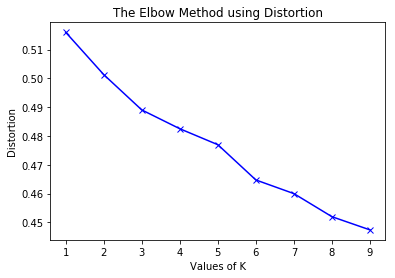

In [44]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

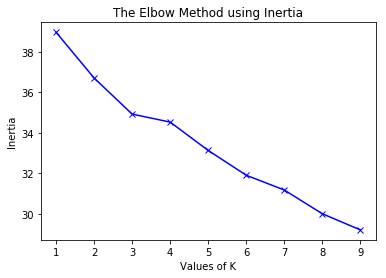

In [45]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

### Cluster Neighborhoods

In [46]:
# set number of clusters
kclusters = 6

#run kmeans algorithm
kmeanModelFinal = KMeans(n_clusters=kclusters).fit(alberta_grouped_clustering)
kmeanModelFinal.fit(alberta_grouped_clustering) 

# check cluster labels generated for each row in the dataframe
kmeanModelFinal.labels_[0:10]

array([3, 0, 0, 0, 5, 0, 2, 0, 0, 0], dtype=int32)

In [47]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeanModelFinal.labels_)

alberta_merged = newdf

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
alberta_merged = alberta_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

alberta_merged.head() # check the last columns!


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,T1A,Medicine Hat,Central Medicine Hat,50.03646,-110.679250,0.0,Coffee Shop,Pub,Ice Cream Shop,Sandwich Place,Italian Restaurant,Bank,Theater,American Restaurant,Distribution Center,Falafel Restaurant
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.964320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.12606,-114.143158,0.0,Café,Gas Station,Asian Restaurant,Convenience Store,Yoga Studio,Falafel Restaurant,Food Truck,Food Court,Food & Drink Shop,Flower Shop
3,T4A,Airdrie,East Airdrie,51.27245,-113.986980,0.0,Pub,Fast Food Restaurant,Pharmacy,Gas Station,Chinese Restaurant,Grocery Store,Salon / Barbershop,Diner,Discount Store,Factory
4,T5A,Edmonton,"West Clareview, East Londonderry",53.58990,-113.441300,0.0,Bus Station,Record Shop,Buffet,Toy / Game Store,Mexican Restaurant,Discount Store,Field,French Restaurant,Dim Sum Restaurant,Forest


In [48]:
alberta_merged=alberta_merged.dropna()

In [49]:
alberta_merged['Cluster Labels'] = alberta_merged['Cluster Labels'].astype(int)

In [50]:
kl_restro = alberta_grouped[["Neighborhood","Fast Food Restaurant"]]

In [51]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
kl_merged = kl_restro.copy()

# add clustering labels
kl_merged["Cluster Labels"] = kmeanModelFinal.labels_

In [52]:
kl_df=newdf[['Neighborhood','Latitude','Longitude']]

In [53]:
kl_df.head()

,Neighborhood,Latitude,Longitude
0,Central Medicine Hat,50.03646,-110.679250
1,"Penbrooke Meadows, Marlborough",51.04968,-113.964320
2,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.12606,-114.143158
3,East Airdrie,51.27245,-113.986980
4,"West Clareview, East Londonderry",53.58990,-113.441300


In [54]:
# merge dataframe with kl_df to add latitude/longitude for each neighborhood
kl_merged = kl_merged.join(kl_df.set_index("Neighborhood"), on="Neighborhood")

print(kl_merged.shape)
kl_merged.head()

(128, 5)


,Neighborhood,Fast Food Restaurant,Cluster Labels,Latitude,Longitude
0,Athabasca,0.000000,3,54.713900,-113.294200
1,Banff,0.010204,0,51.179100,-115.569700
2,Beaumont,0.000000,0,53.357100,-113.412900
3,Blackfalds,0.333333,0,52.386501,-113.783129
4,Bonnyville,0.000000,5,54.267800,-110.732400


Removing Data where Fast Food Restraunats are **zero**

In [55]:
kl_merged = kl_merged[kl_merged['Fast Food Restaurant']!=0]

In [56]:
kl_merged.head()

,Neighborhood,Fast Food Restaurant,Cluster Labels,Latitude,Longitude
1,Banff,0.010204,0,51.179100,-115.569700
3,Blackfalds,0.333333,0,52.386501,-113.783129
7,"Bridgeland, Greenview, Zoo, YYC",0.045455,0,51.063200,-114.061400
13,Central Grande Prairie,0.125000,0,55.172600,-118.799700
14,"Central Jasper Place, Buena Vista",0.222222,0,53.522400,-113.576300


## 5. Visualisation

### Finally, let's visualize the resulting clusters

In [57]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kl_merged['Latitude'], kl_merged['Longitude'], kl_merged['Neighborhood'], kl_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [58]:
map_clusters.save('map_clusters.html')

## 6. Examine Clusters

In [59]:
kl_merged['Cluster Labels'].value_counts()

0    22
5     1
Name: Cluster Labels, dtype: int64

___We can see that there are two clusters where Fast Food restaurants will be a successful business

#### Cluster 1

In [60]:
kl_merged.loc[kl_merged['Cluster Labels'] == 0]

,Neighborhood,Fast Food Restaurant,Cluster Labels,Latitude,Longitude
1,Banff,0.010204,0,51.179100,-115.569700
3,Blackfalds,0.333333,0,52.386501,-113.783129
7,"Bridgeland, Greenview, Zoo, YYC",0.045455,0,51.063200,-114.061400
13,Central Grande Prairie,0.125000,0,55.172600,-118.799700
14,"Central Jasper Place, Buena Vista",0.222222,0,53.522400,-113.576300
22,Cochrane,0.111111,0,51.189600,-114.477400
23,Cold Lake,0.166667,0,54.412700,-110.216200
31,East Airdrie,0.200000,0,51.272450,-113.986980
38,Edson,0.666667,0,53.590800,-116.410400
48,"Inglewood, Burnsland, Chinatown, East Victoria...",0.017857,0,51.041500,-114.059900


#### Cluster 3

In [61]:
kl_merged.loc[kl_merged['Cluster Labels'] == 3]

,Neighborhood,Fast Food Restaurant,Cluster Labels,Latitude,Longitude


## 7.Observations

Most of the restro are concentrated in the Edmonton & Calgary neighborhood of Alberta province of Canada, with the highest number in cluster 1. On the other hand, cluster 3 has only one resto in the neighborhoods. This represents a great opportunity and high potential areas to open new Fast Food Restro as there is very little to no competition from existing restro. Meanwhile, restro in cluster 1 are likely suffering from intense competition due to oversupply and high concentration.
From another perspective, this also shows that the oversupply of restro mostly happened in the central area of the city, with the suburb area still have very few  fast food restro. Therefore, this project recommends property developers to capitalize on these findings to open new restro in neighborhoods in cluster 3 with little to no competition.

Lastly, property developers are advised to avoid neighborhoods in cluster 1 which already have high concentration of restro and suffering from intense competition.